In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import pandas as pd

In [2]:
digits = load_digits()

In [3]:
X = pd.DataFrame(digits.data)
y = digits.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
knn = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors':[1,10,30,50,70,100]
}, cv=5, return_train_score=False)
knn.fit(X_train, y_train)
knn.cv_results_

{'mean_fit_time': array([0.00348301, 0.00337663, 0.00333996, 0.00340428, 0.00379667,
        0.00330963]),
 'std_fit_time': array([0.00074309, 0.00073539, 0.00049764, 0.00063961, 0.00045584,
        0.00015652]),
 'mean_score_time': array([0.45209365, 0.01411057, 0.0152977 , 0.01666684, 0.01804147,
        0.02012596]),
 'std_score_time': array([8.78432145e-01, 3.72668145e-04, 4.55691755e-04, 4.81386994e-04,
        5.09732133e-04, 8.22880795e-04]),
 'param_n_neighbors': masked_array(data=[1, 10, 30, 50, 70, 100],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 10},
  {'n_neighbors': 30},
  {'n_neighbors': 50},
  {'n_neighbors': 70},
  {'n_neighbors': 100}],
 'split0_test_score': array([0.98809524, 0.97619048, 0.95634921, 0.94444444, 0.92460317,
        0.90079365]),
 'split1_test_score': array([0.97619048, 0.96825397, 0.95634921, 0.94047619, 0.92857143,
        0.91269841]),
 'split2_test_scor

In [6]:
df = pd.DataFrame(knn.cv_results_)

In [7]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003483,0.000743,0.452094,0.878432,1,{'n_neighbors': 1},0.988095,0.976190,0.996016,0.988048,1.000000,0.989670,0.008171,1
1,0.003377,0.000735,0.014111,0.000373,10,{'n_neighbors': 10},0.976190,0.968254,0.972112,0.984064,0.976096,0.975343,0.005254,2
2,0.003340,0.000498,0.015298,0.000456,30,{'n_neighbors': 30},0.956349,0.956349,0.936255,0.956175,0.944223,0.949870,0.008258,3
3,0.003404,0.000640,0.016667,0.000481,50,{'n_neighbors': 50},0.944444,0.940476,0.912351,0.928287,0.932271,0.931566,0.011187,4
4,0.003797,0.000456,0.018041,0.000510,70,{'n_neighbors': 70},0.924603,0.928571,0.896414,0.932271,0.916335,0.919639,0.012762,5
5,0.003310,0.000157,0.020126,0.000823,100,{'n_neighbors': 100},0.900794,0.912698,0.880478,0.924303,0.916335,0.906922,0.015237,6


In [8]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'n_neighbors': 1},0.989670
1,{'n_neighbors': 10},0.975343
2,{'n_neighbors': 30},0.949870
3,{'n_neighbors': 50},0.931566
4,{'n_neighbors': 70},0.919639
5,{'n_neighbors': 100},0.906922


In [9]:
knn.best_score_

np.float64(0.989669891861127)

In [10]:
knn.best_params_

{'n_neighbors': 1}

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  1,  0,  4,  0,  0,  0,  0,  2, 46]])

Text(158.22222222222223, 0.5, 'Truth')

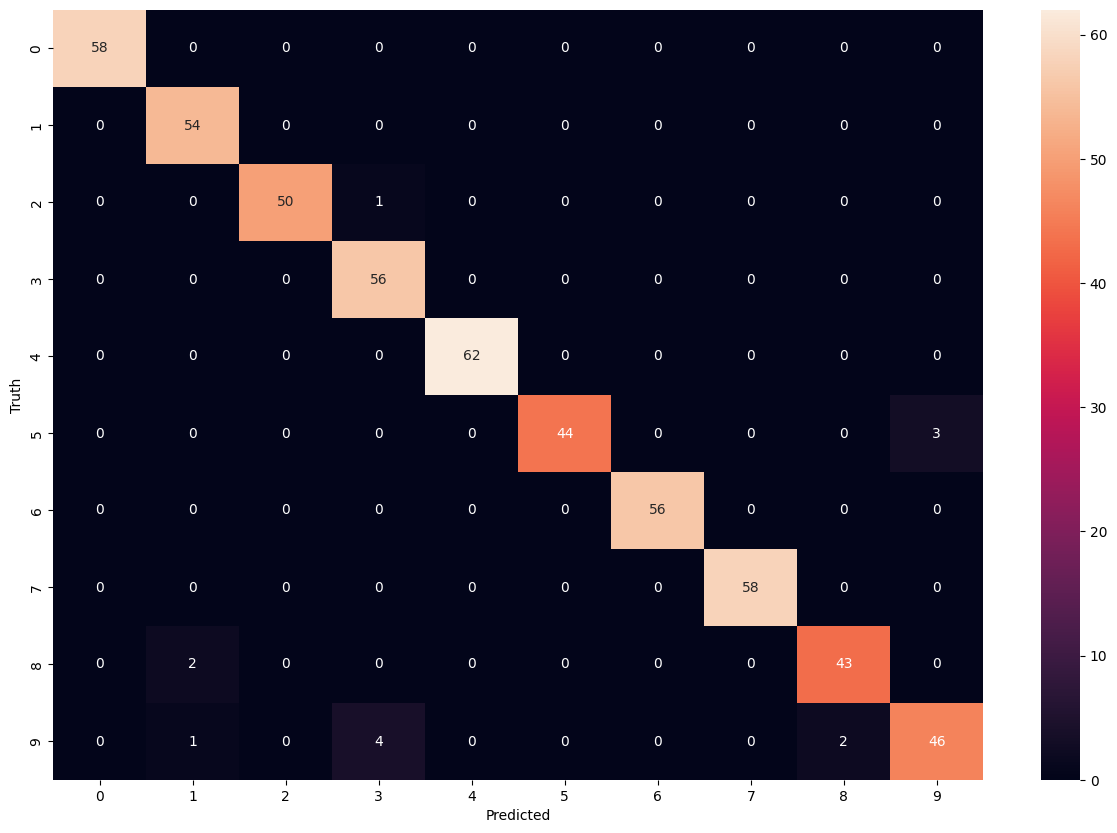

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Truth')